# Lexical Semantics: The Foundation of Natural Language Processing

## Introduction

This notebook explores the theoretical foundations of lexical semantics, which is crucial for text mining and natural language processing. It's fascinating to observe how NLP is deeply rooted in linguistics! Let's explore these fundamental concepts that drive modern text analysis techniques.

## Core Concepts in Lexical Semantics

### What is Lexical Semantics?

**Lexical semantics** is the branch of linguistics that studies the meaning of words. It forms the theoretical basis for many NLP applications including search engines, recommendation systems, sentiment analysis, and machine translation.

# 📚 Lexical Semantics: The Foundation of Natural Language Processing

## 🚀 Introduction

Welcome!  
In this notebook, we explore the **theoretical foundations of lexical semantics**, a core area that underpins **text mining** and **natural language processing (NLP)**.  
It's truly fascinating how deeply NLP is rooted in linguistics!  
Let's dive into these essential concepts that power modern text analysis techniques. 🌟

## 🧠 Core Concepts in Lexical Semantics

### 🔍 What is Lexical Semantics?

**Lexical semantics** is a branch of linguistics that focuses on understanding **the meaning of words**.  
It provides the theoretical backbone for many real-world NLP applications, including:

- 🔎 Search Engines
- 🎯 Recommendation Systems
- 💬 Sentiment Analysis
- 🌐 Machine Translation

Understanding lexical semantics helps us design smarter, more human-like language technologies!

In [14]:
# Libraries we'll use throughout this notebook
import nltk
import spacy
import gensim
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load spaCy model for English
nlp = spacy.load("en_core_web_sm")

### Lemmas and Word Senses

A **lemma** (or citation form) is the canonical form of a word. For example:
- "mouse" is the lemma for both "mouse" and "mice"
- "sing" is the lemma for "sing", "sang", "sung"
- "dormir" (to sleep) in Spanish is the lemma for "duermes" (you sleep)

Many lemmas have multiple meanings, which leads to the concept of **polysemy**.

**Example:** The lemma "mouse" can refer to:
1. A small rodent
2. A hand-operated device that controls a computer cursor

In [15]:
# Example: Finding lemmas using spaCy
text = "The mice were running around while I clicked my mouse to browse websites."
doc = nlp(text)

for token in doc:
    print(f"Word: {token.text}, Lemma: {token.lemma_}")

Word: The, Lemma: the
Word: mice, Lemma: mouse
Word: were, Lemma: be
Word: running, Lemma: run
Word: around, Lemma: around
Word: while, Lemma: while
Word: I, Lemma: I
Word: clicked, Lemma: click
Word: my, Lemma: my
Word: mouse, Lemma: mouse
Word: to, Lemma: to
Word: browse, Lemma: browse
Word: websites, Lemma: website
Word: ., Lemma: .


**Word sense disambiguation** is the computational task of determining which sense of a word is being used in a particular context. This is crucial for accurate machine translation, information retrieval, and content analysis.


In [16]:
# Simple rule-based word sense disambiguation for "mouse"
def simple_mouse_disambiguation(sentence):
    computer_terms = ["click", "cursor", "computer", "screen", "keyboard"]
    animal_terms = ["cat", "rodent", "trap", "cheese", "pet"]
    
    sentence = sentence.lower()
    
    # Count context clues
    computer_score = sum(1 for term in computer_terms if term in sentence)
    animal_score = sum(1 for term in animal_terms if term in sentence)
    
    if computer_score > animal_score:
        return "COMPUTER_DEVICE"
    elif animal_score > computer_score:
        return "ANIMAL"
    else:
        return "UNKNOWN"

# Test cases
print(simple_mouse_disambiguation("I need a new mouse because my cursor keeps freezing"))
print(simple_mouse_disambiguation("The cat chased the mouse around the kitchen"))

COMPUTER_DEVICE
ANIMAL


### Word Relationships

#### Synonymy

**Synonymy** refers to words with identical or very similar meanings. Perfect synonyms would be completely interchangeable without changing the truth conditions of a sentence.

Examples of synonym pairs:
- couch/sofa
- car/automobile 
- vomit/throw up
- filbert/hazelnut

In [17]:
# Using WordNet to find synonyms
from nltk.corpus import wordnet

nltk.download('wordnet')

def get_synonyms(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
    return set(synonyms)  # Remove duplicates

print("Synonyms of 'car':", get_synonyms("car"))
print("Synonyms of 'happy':", get_synonyms("happy"))

Synonyms of 'car': {'railcar', 'machine', 'cable_car', 'automobile', 'gondola', 'railway_car', 'motorcar', 'railroad_car', 'elevator_car', 'car', 'auto'}
Synonyms of 'happy': {'felicitous', 'glad', 'happy', 'well-chosen'}


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/stellaandorno/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**The Principle of Contrast** (Girard 1718, Bréal 1897, Clark 1987) argues that no two words are exactly synonymous - differences in form always signal some difference in meaning. For example, while "water" and "H₂O" refer to the same substance, they differ in usage contexts. "H₂O" is appropriate in scientific contexts, while "water" is more suitable in everyday situations.

#### Word Similarity vs. Relatedness

**Word similarity** measures how alike two words are in meaning. For example, "cat" and "dog" are quite similar as they're both common household pets, even though they're different animals.

**Word relatedness** captures a broader relationship between words that may not be similar but commonly appear in the same contexts. For example, "coffee" and "cup" aren't similar (one is a beverage, the other is a container), but they're strongly related through usage.


In [18]:
# Demonstrating word similarity vs. relatedness using word vectors
import gensim.downloader as api

# Load pre-trained word vectors
word_vectors = api.load('glove-wiki-gigaword-100')

# Similarity between similar words
print("Similarity between 'cat' and 'dog':", 
      word_vectors.similarity('cat', 'dog'))

# Similarity between related but not similar words
print("Similarity between 'coffee' and 'cup':", 
      word_vectors.similarity('coffee', 'cup'))

# Finding most similar words
print("Words most similar to 'doctor':")
for word, score in word_vectors.most_similar('doctor', topn=5):
    print(f"  {word}: {score:.4f}")

Similarity between 'cat' and 'dog': 0.87980753
Similarity between 'coffee' and 'cup': 0.33575124
Words most similar to 'doctor':
  physician: 0.7673
  nurse: 0.7522
  dr.: 0.7175
  doctors: 0.7081
  patient: 0.7074


#### Semantic Fields and Topic Models

A **semantic field** is a set of words related to a common domain or concept. Words in the same semantic field are often related by context rather than synonymy.

Examples of semantic fields:
- Hospital field: surgeon, scalpel, nurse, anesthetic, hospital
- Restaurant field: waiter, menu, plate, food, chef
- House field: door, roof, kitchen, family, bed

**Topic models** like Latent Dirichlet Allocation (LDA) use unsupervised learning to discover these semantic fields automatically from text.


In [19]:
# Simple topic modeling with LDA
from gensim.corpora import Dictionary
from gensim.models import LdaModel

# Sample documents representing different topics
documents = [
    "The doctor performed surgery using a scalpel in the hospital",
    "The nurse administered medication to patients in the ward",
    "The waiter brought menus to the table at the restaurant",
    "The chef prepared a delicious meal in the kitchen",
    "The family relaxed in the living room of their house",
    "The roof of the house needed repairs after the storm"
]

# Preprocess documents
processed_docs = [[word.lower() for word in doc.split() if len(word) > 3] 
                 for doc in documents]

# Create dictionary and corpus
dictionary = Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Train LDA model
lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=3,
    passes=10
)

# Display topics
for topic_id, topic in lda_model.print_topics():
    print(f"Topic {topic_id}: {topic}")

Topic 0: 0.061*"performed" + 0.061*"using" + 0.061*"hospital" + 0.061*"scalpel" + 0.061*"doctor" + 0.061*"surgery" + 0.061*"patients" + 0.061*"administered" + 0.061*"ward" + 0.061*"medication"
Topic 1: 0.103*"house" + 0.059*"repairs" + 0.059*"storm" + 0.059*"roof" + 0.059*"room" + 0.059*"family" + 0.059*"after" + 0.059*"needed" + 0.059*"their" + 0.059*"living"
Topic 2: 0.064*"brought" + 0.064*"menus" + 0.064*"waiter" + 0.064*"restaurant" + 0.064*"table" + 0.064*"delicious" + 0.064*"meal" + 0.064*"chef" + 0.064*"kitchen" + 0.064*"prepared"


### Semantic Frames and Roles

A **semantic frame** represents a set of words that denote perspectives or participants in a particular type of event. Different words can describe the same event from different perspectives.

Example: Commercial Transaction Frame
- Buyer perspective: "Sam bought a book from Ling"
- Seller perspective: "Ling sold a book to Sam"
- Focus on money: "Sam paid Ling for a book"

Semantic frames contain **semantic roles** (like buyer, seller, goods, money), and words in a sentence fill these roles.


In [20]:
# Simple semantic role analyzer for buying/selling events
def analyze_transaction(sentence):
    # Parse the input sentence with the NLP pipeline (e.g., SpaCy)
    doc = nlp(sentence)
    
    # Initialize an empty “frame” with slots for the event type and the three roles
    frame = {
        "event":  None,   # Will hold "purchase" or "sale"
        "buyer":  None,   # Who is buying
        "seller": None,   # Who is selling
        "goods":  None    # What is being transacted
    }
    
    # Loop over every token in the parsed sentence
    for token in doc:
        # If we find a form of the verb “buy”...
        if token.lemma_ == "buy":
            frame["event"] = "purchase"
            
            # Inspect all children of this verb in the dependency tree
            for child in token.head.children:
                # Nominal subject → typically the buyer
                if child.dep_ == "nsubj":
                    frame["buyer"] = child.text
                # Direct object → typically the goods
                elif child.dep_ == "dobj":
                    frame["goods"] = child.text
                # A “from” preposition → the seller will be its object
                elif child.dep_ == "prep" and child.text == "from":
                    for seller in child.children:
                        if seller.dep_ == "pobj":
                            frame["seller"] = seller.text
        
        # If we find a form of the verb “sell”...
        elif token.lemma_ == "sell":
            frame["event"] = "sale"
            
            # Again, look at the verb’s dependency children
            for child in token.head.children:
                # Nominal subject → typically the seller
                if child.dep_ == "nsubj":
                    frame["seller"] = child.text
                # Direct object → typically the goods
                elif child.dep_ == "dobj":
                    frame["goods"] = child.text
                # A “to” preposition → the buyer will be its object
                elif child.dep_ == "prep" and child.text == "to":
                    for buyer in child.children:
                        if buyer.dep_ == "pobj":
                            frame["buyer"] = buyer.text
    
    # Return the filled‐in semantic frame
    return frame

# Test the function with two equivalent perspectives:
#  - “Sam bought a book from Ling” (buyer‐focused)
#  - “Ling sold a book to Sam” (seller‐focused)
print(analyze_transaction("Sam bought a book from Ling"))
print(analyze_transaction("Ling sold a book to Sam"))

{'event': 'purchase', 'buyer': 'Sam', 'seller': 'Ling', 'goods': 'book'}
{'event': 'sale', 'buyer': 'Sam', 'seller': 'Ling', 'goods': 'book'}


### Connotation and Sentiment

**Connotation** refers to the emotional or evaluative meaning associated with a word, beyond its literal definition. Words carry positive, negative, or neutral connotations that impact how a message is received.

Example contrasts:
- Positive vs. Negative: "curious" (positive) vs. "nosy" (negative)  
- Formal vs. Informal: "residence" (formal) vs. "pad" (informal)
- Technical vs. Everyday: "H₂O" (technical) vs. "water" (everyday)

According to early work by Osgood et al. (1957), words vary along three dimensions:

1. **Valence**: the pleasantness of the stimulus (happy → high, sad → low)
2. **Arousal**: the intensity of emotion provoked (excited → high, calm → low)
3. **Dominance**: the degree of control exerted (controlling → high, influenced → low)

Sentence: The movie was absolutely wonderful and inspiring.
  Sentiment: {'neg': 0.0, 'neu': 0.415, 'pos': 0.585, 'compound': 0.7939}
  Overall: Positive

Sentence: The film was okay, nothing special.
  Sentiment: {'neg': 0.277, 'neu': 0.49, 'pos': 0.233, 'compound': -0.092}
  Overall: Negative

Sentence: That movie was terrible and a complete waste of time.
  Sentiment: {'neg': 0.457, 'neu': 0.543, 'pos': 0.0, 'compound': -0.7096}
  Overall: Negative

Sentence: The young man was curious about how the machine worked.
  Sentiment: {'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'compound': 0.3182}
  Overall: Positive

Sentence: The nosy neighbor kept looking through our windows.
  Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
  Overall: Neutral



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/stellaandorno/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


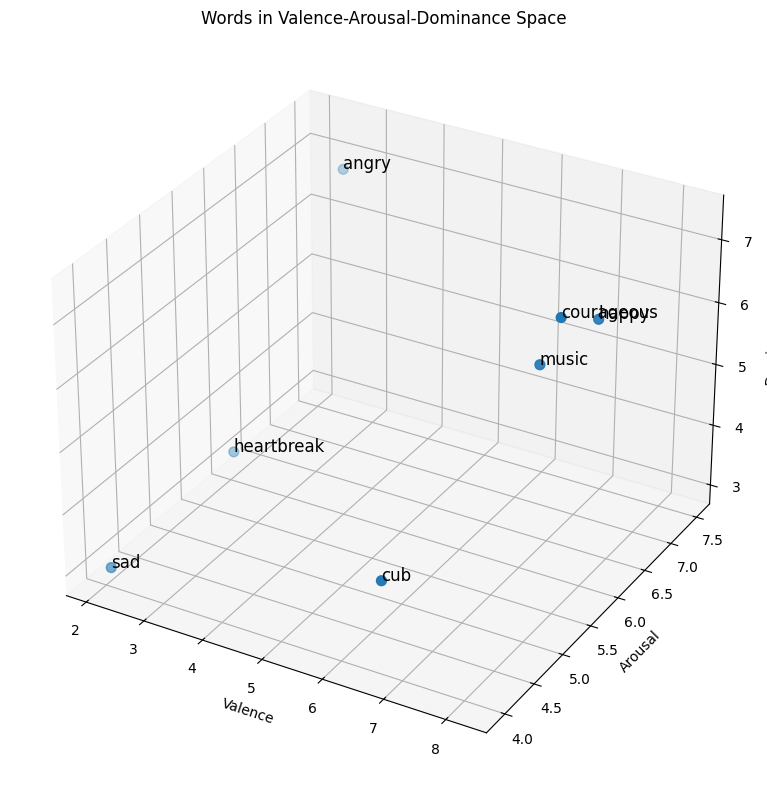

In [21]:
# Sentiment analysis using VADER
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

# Example sentences with different connotations
sentences = [
    "The movie was absolutely wonderful and inspiring.",
    "The film was okay, nothing special.",
    "That movie was terrible and a complete waste of time.",
    "The young man was curious about how the machine worked.",
    "The nosy neighbor kept looking through our windows."
]

# Analyze sentiment
for sentence in sentences:
    sentiment_scores = sid.polarity_scores(sentence)
    print(f"Sentence: {sentence}")
    print(f"  Sentiment: {sentiment_scores}")
    
    # Interpret the compound score
    if sentiment_scores['compound'] >= 0.05:
        print("  Overall: Positive")
    elif sentiment_scores['compound'] <= -0.05:
        print("  Overall: Negative")
    else:
        print("  Overall: Neutral")
    print()

# Visualizing words in the valence-arousal-dominance space
vad_words = {
    'courageous': [8.05, 5.5, 7.38],  # [valence, arousal, dominance]
    'music': [7.67, 5.57, 6.5],
    'heartbreak': [2.45, 5.65, 3.58],
    'cub': [6.71, 3.95, 4.24],
    'happy': [8.2, 6.0, 7.0],
    'sad': [2.1, 4.0, 3.0],
    'angry': [2.5, 7.5, 6.8]
}

# Create DataFrame for visualization
vad_df = pd.DataFrame.from_dict(vad_words, orient='index', 
                               columns=['Valence', 'Arousal', 'Dominance'])

# Plot in 3D space
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(vad_df['Valence'], vad_df['Arousal'], vad_df['Dominance'], s=50)

# Add word labels
for word, pos in zip(vad_df.index, vad_df.values):
    ax.text(pos[0], pos[1], pos[2], word, size=12)

ax.set_xlabel('Valence')
ax.set_ylabel('Arousal')
ax.set_zlabel('Dominance')
ax.set_title('Words in Valence-Arousal-Dominance Space')

plt.tight_layout()
plt.show()

## Real-World Applications

Lexical semantics concepts have numerous practical applications in NLP:

1. **Search Engine Optimization**: Understanding synonyms, semantic fields, and word relationships helps search engines return relevant results even when query terms don't exactly match document terms.

2. **Chatbots and Virtual Assistants**: Word sense disambiguation and semantic frames enable more natural interactions by correctly interpreting user requests in context.

3. **Content Recommendation**: Semantic similarity helps recommend relevant articles, products, or media based on users' interests.

4. **Sentiment Analysis**: Applications in market research, social media monitoring, and customer feedback analysis use connotation and sentiment to gauge public opinion.

5. **Machine Translation**: Understanding semantic frames and word relationships across languages enables more accurate translations.

6. **Text Summarization**: Identifying key semantic fields and important concepts helps in creating concise summaries.

7. **Question Answering Systems**: Understanding semantic roles and frames helps systems correctly interpret questions and find appropriate answers.

## Conclusion

Lexical semantics provides the theoretical foundation for many modern NLP techniques. By understanding how words relate to each other in meaning, we can build more sophisticated systems for processing and generating human language. As NLP continues to evolve, these fundamental linguistic concepts remain essential for creating truly intelligent language technologies.